## In this program, we want to perform price optimization based on historical data.

### - Import the neccessary python libraries for this project

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

### - Import the historical sales and pricing data 

In [2]:
# This is a generated dataset using the NUMPY & PANDAS python libraries
data = pd.read_csv('historical_data.csv')

### - To get information about the dataset

In [4]:
data.info()
# The dataset has 5 columns and 100 entries with no empty entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     100 non-null    object 
 1   Price          100 non-null    float64
 2   Quantity_Sold  100 non-null    int64  
 3   Min_Price      100 non-null    float64
 4   Max_Price      100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [5]:
data.head(10)

,Product_ID,Price,Quantity_Sold,Min_Price,Max_Price
0,Product_1,59.393215,3,5.175711,99.721107
1,Product_2,74.367043,4,10.399671,121.048712
2,Product_3,64.248704,95,15.949858,84.476869
3,Product_4,59.039486,99,7.574445,113.993932
4,Product_5,48.128932,14,12.815549,148.424660
5,Product_6,68.130470,41,5.815070,141.355367
6,Product_7,49.382849,73,7.999948,103.671127
7,Product_8,90.259570,20,5.277827,147.309911
8,Product_9,96.729648,96,16.905466,96.219114
9,Product_10,44.509737,73,8.358870,146.452318


### - In this project, we'll use a simple linear demand curve to estimate the revenue

In [6]:
def revenue(prices):
    return -np.sum(prices * data['Quantity_Sold'])

### - To set the price bounds for each product, we have to get the minimum and maximum price per product

In [7]:
price_bounds = [(min_price, max_price) for min_price, max_price in zip(data['Min_Price'], data['Max_Price'])]

### - To find the optimal prices that maximize revenue while satisfying the price bounds

In [10]:
initial_prices = data['Price'].values
result = minimize(revenue, initial_prices, bounds=price_bounds)

# extract the optimized prices
optimized_prices = result.x

### - To update the product prices according to the optimized prices

In [11]:
data['Optimized_Price'] = optimized_prices

### - To update your file, you have to save the data as a new csv file

In [12]:
data.to_csv('optimized_data.csv', index=False)

In [13]:
Optimized_Data = pd.read_csv('optimized_data.csv')

In [16]:
Optimized_Data

,Product_ID,Price,Quantity_Sold,Min_Price,Max_Price,Optimized_Price
0,Product_1,59.393215,3,5.175711,99.721107,99.721107
1,Product_2,74.367043,4,10.399671,121.048712,121.048712
2,Product_3,64.248704,95,15.949858,84.476869,84.476869
3,Product_4,59.039486,99,7.574445,113.993932,113.993932
4,Product_5,48.128932,14,12.815549,148.424660,148.424660
...,...,...,...,...,...,...
95,Product_96,26.487223,4,6.504409,143.278877,143.278877
96,Product_97,62.786164,32,5.246444,118.066417,118.066417
97,Product_98,11.809679,10,18.942940,111.983800,111.983800
98,Product_99,84.604603,11,15.048748,141.742899,141.742899


In [20]:
import seaborn as sns

<Axes: xlabel='Max_Price', ylabel='Optimized_Price'>

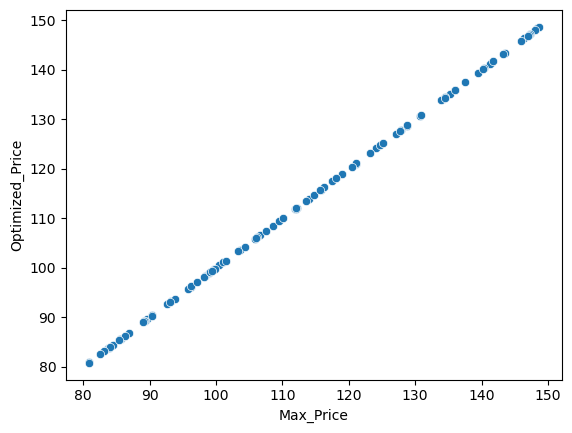

In [27]:
sns.scatterplot(data = Optimized_Data, x='Max_Price', y= 'Optimized_Price', hue=None)